## GSEA analysis 

We performed GSEA to test if the genes highlighted by SHAP as key contributors to synergy predictions tend to come from particular biological pathways more than random chance. Used to identify pathways that are highly associated with the model’s prediction.

For this we used 3 libraries with different amounts of sets: MSigDB Hallmark 2020 (50), Reactome 2016 (1736), GO Biological Process 2021 (7608).

Some of the metrics that exist and we looked at are 
- NES (Normalized Enrichment Score): Measuring strength of pathway enrichment.
- p-value: Test if NES is due to chance (unadjusted).
- q-value: Adjusted p-value for multiple comparisons (FDR).

We will analyze the q-value results (more reliable) in depth at the end of the notebook.

In [13]:
import os
import pandas as pd
import matplotlib.pyplot as plt

results_dir = "../shapley/results/gsea_results"

libraries = [
    "MSigDB_Hallmark_2020",
    "Reactome_2016",
    "GO_Biological_Process_2021"
]

In [14]:
def load_biomining_results(lib: str) -> pd.DataFrame:
    path = os.path.join(results_dir, f"biomining_GSEA_{lib}.pkl")
    if os.path.exists(path):
        df = pd.read_pickle(path)
        df["Library"] = lib
        return df
    else:
        print(f"File not found: {path}")
        return pd.DataFrame()

all_bio_results = pd.concat([load_biomining_results(lib) for lib in libraries], ignore_index=True)

In [15]:
def load_transynergy_results(lib: str) -> pd.DataFrame:
    path = os.path.join(results_dir, f"transynergy_GSEA_{lib}.pkl")
    if os.path.exists(path):
        df = pd.read_pickle(path)
        df["Library"] = lib
        return df
    else:
        print(f"File not found: {path}")
        return pd.DataFrame()

all_tran_results = pd.concat([load_transynergy_results(lib) for lib in libraries], ignore_index=True)

In [16]:
def summarize_top_pathways(df, paper, top_n=5):
    for lib in libraries:
        subset = df[(df.Library == lib)]
        if subset.empty:
            continue
        if paper == "Biomining":
            print(f"\nTop {top_n} enriched pathways for {paper} {lib}:")
        else:
            print(f"\nTop {top_n} enriched pathways for {paper} {lib}:")
        display(subset.sort_values("NES", ascending=False).head(top_n)[
            ["Term", "NES", "NOM p-val", "FDR q-val", "Lead_genes"]
        ])

summarize_top_pathways(all_bio_results, "Biomining")
summarize_top_pathways(all_tran_results, "Transynergy")


Top 5 enriched pathways for Biomining MSigDB_Hallmark_2020:


,Term,NES,NOM p-val,FDR q-val,Lead_genes
1,Pperoxisome,1.588987,0.00753,0.085614,TOP2A;NR1I2
4,E2F Targets,1.325653,0.116393,0.460047,TOP2A
6,Bile Acid Metabolism,1.238614,0.186373,0.876771,NR1I2
7,Estrogen Response Late,1.190522,0.223127,0.848147,TOP2A;RET
8,G2-M Checkpoint,1.157645,0.286634,0.802503,TOP2A



Top 5 enriched pathways for Biomining Reactome_2016:


,Term,NES,NOM p-val,FDR q-val,Lead_genes
43,VEGF ligand-receptor interactions Homo sapiens...,1.651012,0.004511,0.397178,FLT1;KDR;FLT4
42,VEGF binds to VEGFR leading to receptor dimeri...,1.651012,0.004511,0.397178,FLT1;KDR;FLT4
89,"Cell Cycle, Mitotic Homo sapiens R-HSA-69278",1.327145,0.115824,0.925663,TOP2A
88,SUMOylation Homo sapiens R-HSA-2990846,1.327145,0.115824,0.925663,TOP2A
92,Cell Cycle Homo sapiens R-HSA-1640170,1.327145,0.115824,0.925663,TOP2A



Top 5 enriched pathways for Biomining GO_Biological_Process_2021:


,Term,NES,NOM p-val,FDR q-val,Lead_genes
283,peptidyl-tyrosine phosphorylation (GO:0018108),1.654887,0.02104,0.371197,FLT1;KDR;FLT4;KIT;CSF1R;ABL1;EGFR;PDGFRB
282,peptidyl-tyrosine modification (GO:0018212),1.654887,0.02104,0.371197,FLT1;KDR;FLT4;KIT;CSF1R;ABL1;EGFR;PDGFRB
281,protein autophosphorylation (GO:0046777),1.654887,0.02104,0.371197,FLT1;KDR;FLT4;KIT;CSF1R;ABL1;EGFR;PDGFRB
284,protein phosphorylation (GO:0006468),1.650593,0.020408,0.292307,FLT1;KDR;FLT4;KIT;RET;CSF1R;ABL1;EGFR;PDGFRB
287,positive regulation of kinase activity (GO:003...,1.649834,0.016109,0.168055,FLT1;KDR;FLT4;KIT;RET;CSF1R;EGFR;PDGFRB



Top 5 enriched pathways for Transynergy MSigDB_Hallmark_2020:


,Term,NES,NOM p-val,FDR q-val,Lead_genes
1,Bile Acid Metabolism,1.575504,0.0,0.510886,NR1I2;AR
2,E2F Targets,1.53324,0.05075,0.370503,TUBB;WEE1;AURKB;CHEK1;TOP2A;AURKA;NOLC1;CDK1;N...
3,Spermatogenesis,1.388023,0.101839,0.783212,MTOR;PARP2;AURKA
4,Myc Targets V1,1.373584,0.098143,0.65705,TYMS;CDK2;HSP90AB1;NOLC1
5,Apical Junction,1.359523,0.112299,0.576288,EGFR;AKT2;AKT3;PIK3CB



Top 5 enriched pathways for Transynergy Reactome_2016:


,Term,NES,NOM p-val,FDR q-val,Lead_genes
44,Cell Cycle Homo sapiens R-HSA-1640170,2.207814,0.0,0.001119,TUBB;WEE1;PSMB1;PSMB5;PSMB8;TYMS;CDK2;AURKB;CH...
45,"Cell Cycle, Mitotic Homo sapiens R-HSA-69278",2.178763,0.0,0.000559,TUBB;WEE1;PSMB1;PSMB5;PSMB8;TYMS;CDK2;AURKB;TO...
46,Gene Expression Homo sapiens R-HSA-74160,2.10625,0.0,0.001119,MTOR;NR1I2;AR;PSMB1;PSMB5;PARP1;PSMB8;AKT1;AKT...
47,G2/M Transition Homo sapiens R-HSA-69275,2.024467,0.001159,0.004027,TUBB;WEE1;PSMB1;PSMB5;PSMB8;CDK2;HSP90AA1;AURK...
48,Mitotic G2-G2/M phases Homo sapiens R-HSA-453274,2.024467,0.001159,0.004027,TUBB;WEE1;PSMB1;PSMB5;PSMB8;CDK2;HSP90AA1;AURK...



Top 5 enriched pathways for Transynergy GO_Biological_Process_2021:


,Term,NES,NOM p-val,FDR q-val,Lead_genes
636,peptidyl-serine modification (GO:0018209),1.921446,0.003468,0.158446,MTOR;PARP1;PARP2;AKT1;TOP1;AKT2;AKT3;CDK2;AURK...
637,cellular response to hypoxia (GO:0071456),1.873218,0.00142,0.149897,MTOR;PSMB1;PSMB5;PSMB8
638,protein-DNA complex assembly (GO:0065004),1.872431,0.0,0.100311,PSMB1;PSMB5;PARP1;PSMB8
640,positive regulation of canonical Wnt signaling...,1.872128,0.0,0.060415,EGFR;PSMB1;PSMB5;PSMB8
639,positive regulation of Wnt signaling pathway (...,1.872128,0.0,0.060415,EGFR;PSMB1;PSMB5;PSMB8


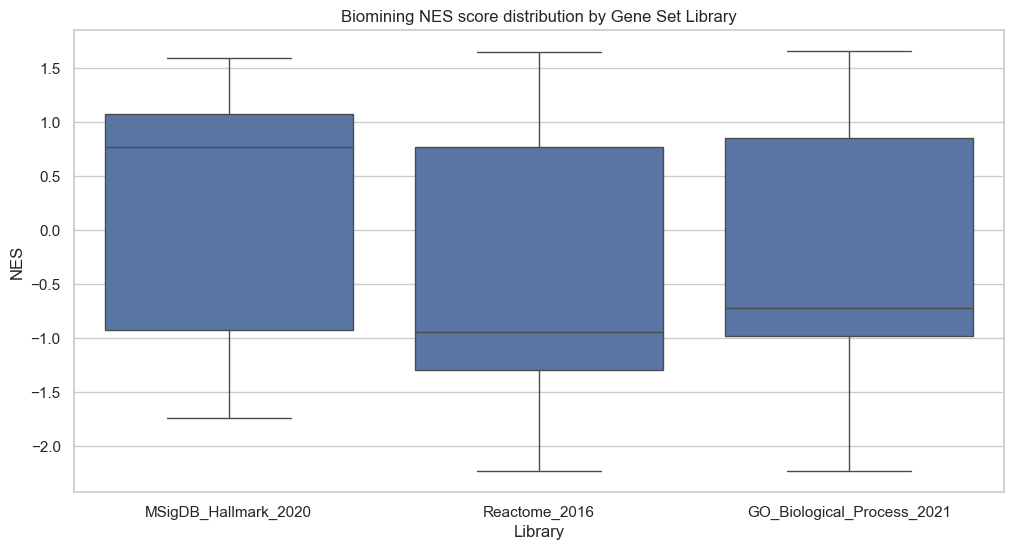

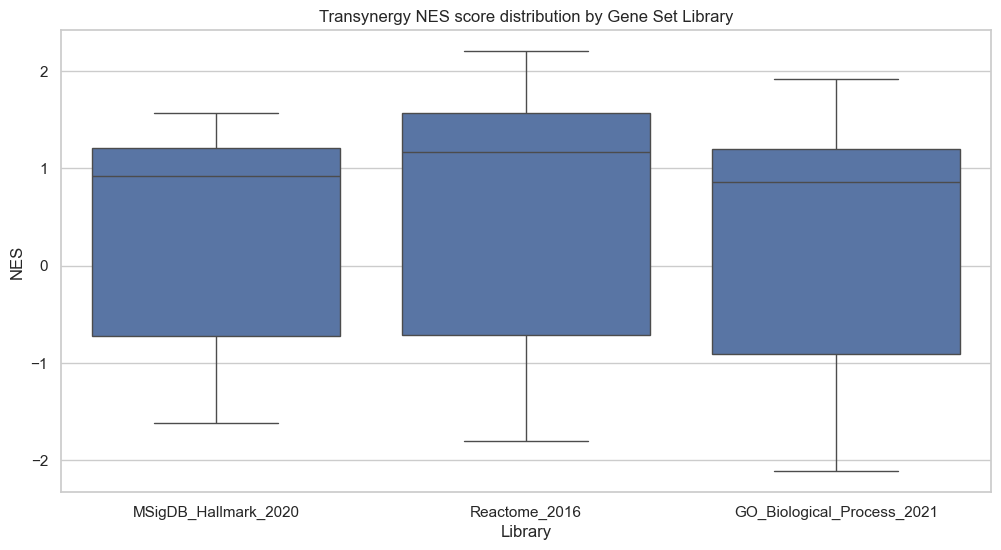

In [17]:
import seaborn as sns
sns.set_theme(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.boxplot(data=all_bio_results, x="Library", y="NES")
plt.title("Biomining NES score distribution by Gene Set Library")
plt.show()


plt.figure(figsize=(12, 6))
sns.boxplot(data=all_tran_results, x="Library", y="NES")
plt.title("Transynergy NES score distribution by Gene Set Library")
plt.show()

In [18]:
import re

def summarize_top_pathways(df, paper, top_n=5):
    for lib in libraries:
        subset = df[(df.Library == lib)]
        if subset.empty:
            continue
        
        # Filter out rows where "Lead_genes" contains "PIK" and RAS family members, were being overrepresented
        subset = subset[~subset['Lead_genes'].str.contains(r'\bPIK\w*\b|\b\w*RAS\w*\b', flags=re.IGNORECASE, regex=True)]
        
        if paper == "Biomining":
            print(f"\nTop {top_n} reliable pathways for {paper} {lib}:")
        else:
            print(f"\nTop {top_n} reliable pathways for {paper} {lib}:")
        
        # Display top N pathways sorted by q-value
        display(subset.sort_values("FDR q-val", ascending=True).head(top_n)[
            ["Term", "NES", "NOM p-val", "FDR q-val", "Lead_genes"]
        ])


summarize_top_pathways(all_bio_results, "Biomining")
summarize_top_pathways(all_tran_results, "Transynergy")


Top 5 reliable pathways for Biomining MSigDB_Hallmark_2020:


,Term,NES,NOM p-val,FDR q-val,Lead_genes
1,Pperoxisome,1.588987,0.00753,0.085614,TOP2A;NR1I2
3,Spermatogenesis,-1.349951,0.057803,0.175365,NF2
5,Apical Surface,-1.272641,0.154876,0.365771,GATA3
4,E2F Targets,1.325653,0.116393,0.460047,TOP2A
11,KRAS Signaling Up,1.062473,0.457557,0.760341,FLT4



Top 5 reliable pathways for Biomining Reactome_2016:


,Term,NES,NOM p-val,FDR q-val,Lead_genes
87,RHO GTPases activate PAKs Homo sapiens R-HSA-5...,-1.349951,0.057803,0.184457,NF2
125,Transcriptional Regulation by TP53 Homo sapien...,-1.240029,0.256158,0.37406,PTEN;TP53
124,TP53 Regulates Metabolic Genes Homo sapiens R-...,-1.240029,0.256158,0.37406,PTEN;TP53
42,VEGF binds to VEGFR leading to receptor dimeri...,1.651012,0.004511,0.397178,FLT1;KDR;FLT4
43,VEGF ligand-receptor interactions Homo sapiens...,1.651012,0.004511,0.397178,FLT1;KDR;FLT4



Top 5 reliable pathways for Biomining GO_Biological_Process_2021:


,Term,NES,NOM p-val,FDR q-val,Lead_genes
285,regulation of kinase activity (GO:0043549),1.649834,0.016109,0.168055,FLT1;KDR;FLT4;KIT;RET;CSF1R;EGFR;PDGFRB
286,positive regulation of transferase activity (G...,1.649834,0.016109,0.168055,FLT1;KDR;FLT4;KIT;RET;CSF1R;EGFR;PDGFRB
287,positive regulation of kinase activity (GO:003...,1.649834,0.016109,0.168055,FLT1;KDR;FLT4;KIT;RET;CSF1R;EGFR;PDGFRB
293,hematopoietic progenitor cell differentiation ...,1.577385,0.039897,0.271443,FLT1;KDR;FLT4;KIT;CSF1R
294,hemopoiesis (GO:0030097),1.577385,0.039897,0.271443,FLT1;KDR;FLT4;KIT;CSF1R



Top 5 reliable pathways for Transynergy MSigDB_Hallmark_2020:


,Term,NES,NOM p-val,FDR q-val,Lead_genes
0,Unfolded Protein Response,-1.616372,0.028571,0.260902,SLC1A4;EEF2;H2AX;SLC7A5;EIF4EBP1;HERPUD1;BANF1...
2,E2F Targets,1.53324,0.05075,0.370503,TUBB;WEE1;AURKB;CHEK1;TOP2A;AURKA;NOLC1;CDK1;N...
9,PI3K/AKT/mTOR Signaling,1.313849,0.153846,0.43993,EGFR;AKT1;CDK2
8,G2-M Checkpoint,1.315965,0.16368,0.486388,TOP1;AURKB;CHEK1;TOP2A;AURKA;NOLC1
1,Bile Acid Metabolism,1.575504,0.0,0.510886,NR1I2;AR



Top 5 reliable pathways for Transynergy Reactome_2016:


,Term,NES,NOM p-val,FDR q-val,Lead_genes
45,"Cell Cycle, Mitotic Homo sapiens R-HSA-69278",2.178763,0.0,0.000559,TUBB;WEE1;PSMB1;PSMB5;PSMB8;TYMS;CDK2;AURKB;TO...
44,Cell Cycle Homo sapiens R-HSA-1640170,2.207814,0.0,0.001119,TUBB;WEE1;PSMB1;PSMB5;PSMB8;TYMS;CDK2;AURKB;CH...
46,Gene Expression Homo sapiens R-HSA-74160,2.10625,0.0,0.001119,MTOR;NR1I2;AR;PSMB1;PSMB5;PARP1;PSMB8;AKT1;AKT...
47,G2/M Transition Homo sapiens R-HSA-69275,2.024467,0.001159,0.004027,TUBB;WEE1;PSMB1;PSMB5;PSMB8;CDK2;HSP90AA1;AURK...
48,Mitotic G2-G2/M phases Homo sapiens R-HSA-453274,2.024467,0.001159,0.004027,TUBB;WEE1;PSMB1;PSMB5;PSMB8;CDK2;HSP90AA1;AURK...



Top 5 reliable pathways for Transynergy GO_Biological_Process_2021:


,Term,NES,NOM p-val,FDR q-val,Lead_genes
633,amyloid-beta metabolic process (GO:0050435),-1.972654,0.003717,0.022635,NCSTN;APH1B;PSEN1;APH1A;PSENEN
635,protein maturation (GO:0051604),-1.972654,0.003717,0.022635,NCSTN;APH1B;PSEN1;APH1A;PSENEN
634,amyloid precursor protein catabolic process (G...,-1.972654,0.003717,0.022635,NCSTN;APH1B;PSEN1;APH1A;PSENEN
631,ephrin receptor signaling pathway (GO:0048013),-1.972654,0.003717,0.022635,NCSTN;APH1B;PSEN1;APH1A;PSENEN
630,membrane protein proteolysis (GO:0033619),-1.972654,0.003717,0.022635,NCSTN;APH1B;PSEN1;APH1A;PSENEN


## Biomining

The key finding across libraries involves growth factor receptor signaling. Reactome specifically identifies VEGF-VEGFR pathways (VEGF was also identified in the paper as critical target inhibited by synergistic drug pairs) and in the GO library this shows up as regulation of kinase activity pathways featuring receptor tyrosine kinase (RTK) genes (also heavily highlighted in the paper as a family known to play a critical role in breast cancer development). These pathways are fundamental to cancer biology, as they control blood vessel formation and therefore tumor growth and metastasis.

It also reveals involvement of critical tumor suppressor pathways, particularly TP53 regulation processes and of pathways regulating cell cycle progression, namely E2F targets. These pathways represent the cell's natural defense mechanisms against cancer and their dysregulation is a key sign that cancer is developing.

It overall shows mostly cancer related pathways across all 3 with e.g other pathways like hemopoiesis, which is relevant to blood cancers.

The first library shows the most surprising results with pathways like Spermatogenesis, which is the process of sperm cell development and seems very unrelated to cancer, but it could mean that some genes involved in normal developmental processes are also taken by cancer. Peroxisome Pathways is also more commonly associated with metabolic disorders than cancer. But this is from the first library which did not contain all genes and also has less pathways to identify from so we can assume these are pathways are not actually identified as relevant.


## Transynergy

The most important findings across libraries involve cell cycle control mechanisms. Reactome identifies mitotic progression and G2/M transition pathways with highly significant q-values. MSigDB library also shows this with E2F targets and G2-M checkpoint pathways. This cell cycle dysregulation is a fundamental sign of cancer, where normal growth controls are lost, leading to uncontrolled spread.

We can also see in the 3 libraries an involvement of protein processing pathways. This suggests that maybe these processes are critical in the drug synergy context, since cancer cells often depend on stronger protein breakdown and stress response systems.

Surprisingly, in Transynergy the GO library (with the most comprehensive gene coverage) shows the most unexpected results. It identifies amyloid-Beta Metabolic Process & Protein Maturation, that are strongly associated with Alzheimer's disease and neurodegeneration, not cancer. This maybe suggests that there is an unknown connection of these processes and cancer drug synergy or that drugs might be affecting these pathways by accident or it could be a mistake. GO library also highlights Ephrin Receptor Signaling, this pathway can be linked to cancer, especially in forming new blood vessel. However, in this analysis, the genes driving its signal not typical to this pathway. This suggests the pathway showed up probably not because it is actually active, but because gene sets overlap in the database.
